In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nt = 1000 #intervalos temporales
Nx = 50 #intervalos espaciales en x

t = np.linspace(0,10,Nt) #s
x = np.linspace(0,1,Nx) #m

deltat = t[1] - t[0] #paso temporal
deltax = x[1] - x[0] #paso espacial en x

D = 0.01
a = 0.2
b = 0.3
e = 0.03

lambda_ = (D*deltat)/(deltax**2) #mismo coeficiente para ambos

print("el parámetro de difusión λ = " + str(round(lambda_,2)) + " < 0.5.")

el parámetro de difusión λ = 0.24 < 0.5.


In [3]:
def ui(x):
    return (np.random.uniform(0,0.3,len(x)))

In [4]:
def Initu():
    
    u = np.zeros((Nt,Nx))
    
    u[0,:] = ui(x)

    u[:,0] = 0.1
    u[:,-1] = 0.2

    return u

In [5]:
u = Initu()
w = np.zeros((Nt,Nx))

In [6]:
def GetSolution(u,w):
    
    for l in tqdm(range(1,len(t))):
        
        for i in range(1,len(x)-1):
            
            u[l,i] = lambda_*(u[l-1,i+1]-2*u[l-1,i]+u[l-1,i-1]) - deltat*u[l-1,i]*(u[l-1,i]-a)*(1-u[l-1,i]) + deltat*w[l-1,i] + u[l-1,i]
            w[l,i] = deltat*e*(u[l-1,i]-b*w[l-1,i]) + w[l-1,i]

In [7]:
GetSolution(u,w)

100%|██████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 9226.67it/s]


<IPython.core.display.Javascript object>


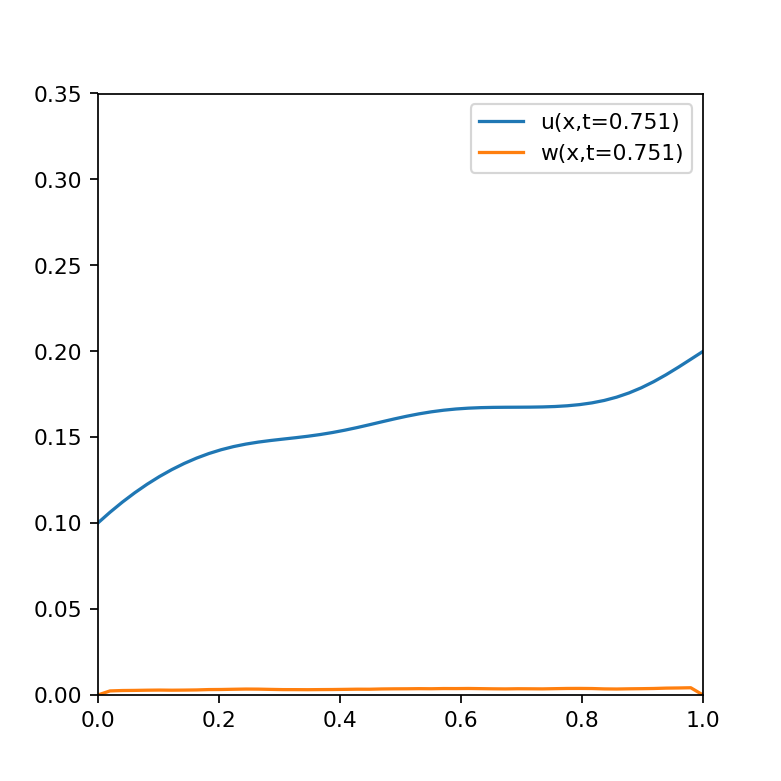

In [8]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    
    ax.clear()
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.35)
    
def Update(i):
    
    init()
    ax.plot(x,u[i,:],label=r"u(x,t={:.3f})".format(t[i]))
    ax.plot(x,w[i,:],label=r"w(x,t={:.3f})".format(t[i]))

    ax.legend()
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)